# Normalización de las señales
----
## Normalización de amplitud
$$N_{Amplitud}=\frac{Se\tilde{n}al_{Original}}{Max\left ( Abs\left ( Se\tilde{n}al_{Original} \right ) \right )}$$
$$N_{Amplitud}=2*\frac{S_{Original}-Min(S_{Original})}{Max(S_{original})-Min(S_{Original})}-1$$
$$ x’ = (b-a)\frac {x - \min {x}} {\max {x} - \min {x}} + a $$
donde $a$ y $b$ son los límites del nuevo rango, en este caso -1 y 1

https://stats.stackexchange.com/questions/178626/how-to-normalize-data-between-1-and-1

In [36]:
import wfdb
import numpy as np
from scipy import signal
from scipy.signal import filtfilt, butter, kaiserord, lfilter, firwin, resample_poly, freqz
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
FS = 360
FC = 0.67  # Recomendada en la bibliografia
FACTOR = 2  # Recomendada en la bibliografia
CORTE_INFERIOR,CORTE_SUPERIOR=286280, 287280


#EXTRACCIÓN DE LA SEÑAL
data_path = 'C:\\Users\\jdani\\Desktop\\Trabajo de grado\\BaseDeDatos\\mit_bih_arrhythmiadatabase\\'
paciente = '105'  # Paciente representativo escogido

# Extracción de las dos señales
grabacion = wfdb.rdrecord(data_path+paciente)
senal_ecg_original = grabacion.p_signal
# Extrayendo los dos canales de la señal
senal_ecg_canal_I = senal_ecg_original[CORTE_INFERIOR:CORTE_SUPERIOR, 0].reshape(-1)  # Canal 1
senal_ecg_canal_II = senal_ecg_original[CORTE_INFERIOR:CORTE_SUPERIOR, 1].reshape(-1)  # Canal 2

#Normalización de la señal (normalizacion de amplitud)
maximo_I=np.amax(senal_ecg_canal_I)
maximo_II=np.amax(senal_ecg_canal_II)
minimo_I=np.amin(senal_ecg_canal_I)
minimo_II=np.amin(senal_ecg_canal_II)
senal_ecg_I_NA=((senal_ecg_canal_I-minimo_I)/(maximo_I-minimo_I))*2-1
senal_ecg_II_NA=((senal_ecg_canal_II-minimo_II)/(maximo_II-minimo_II))*2-1

## Normalización Estandar
$$N_{Estandar}=\frac{Se\tilde{n}al_{Original}-Prom\left (Se\tilde{n}al_{Original}  \right )}{Desviaci\acute{o}n_{Estandar}\left (Se\tilde{n}al_{Original}  \right )}$$

In [37]:
def normalizacion_estandar(senial):
    return (senial-np.mean(senial))/np.std(senial)

senal_ecg_I_filtrada_NS=normalizacion_estandar(senal_ecg_canal_I)
senal_ecg_II_filtrada_NS=normalizacion_estandar(senal_ecg_canal_II)

## Gráfica

In [38]:
time=[]
for i in range(CORTE_INFERIOR,CORTE_SUPERIOR):
    time.append(i/360)# ya que son 360 muestras por segundo, escalo el rango anterior a su equivalente en segundos


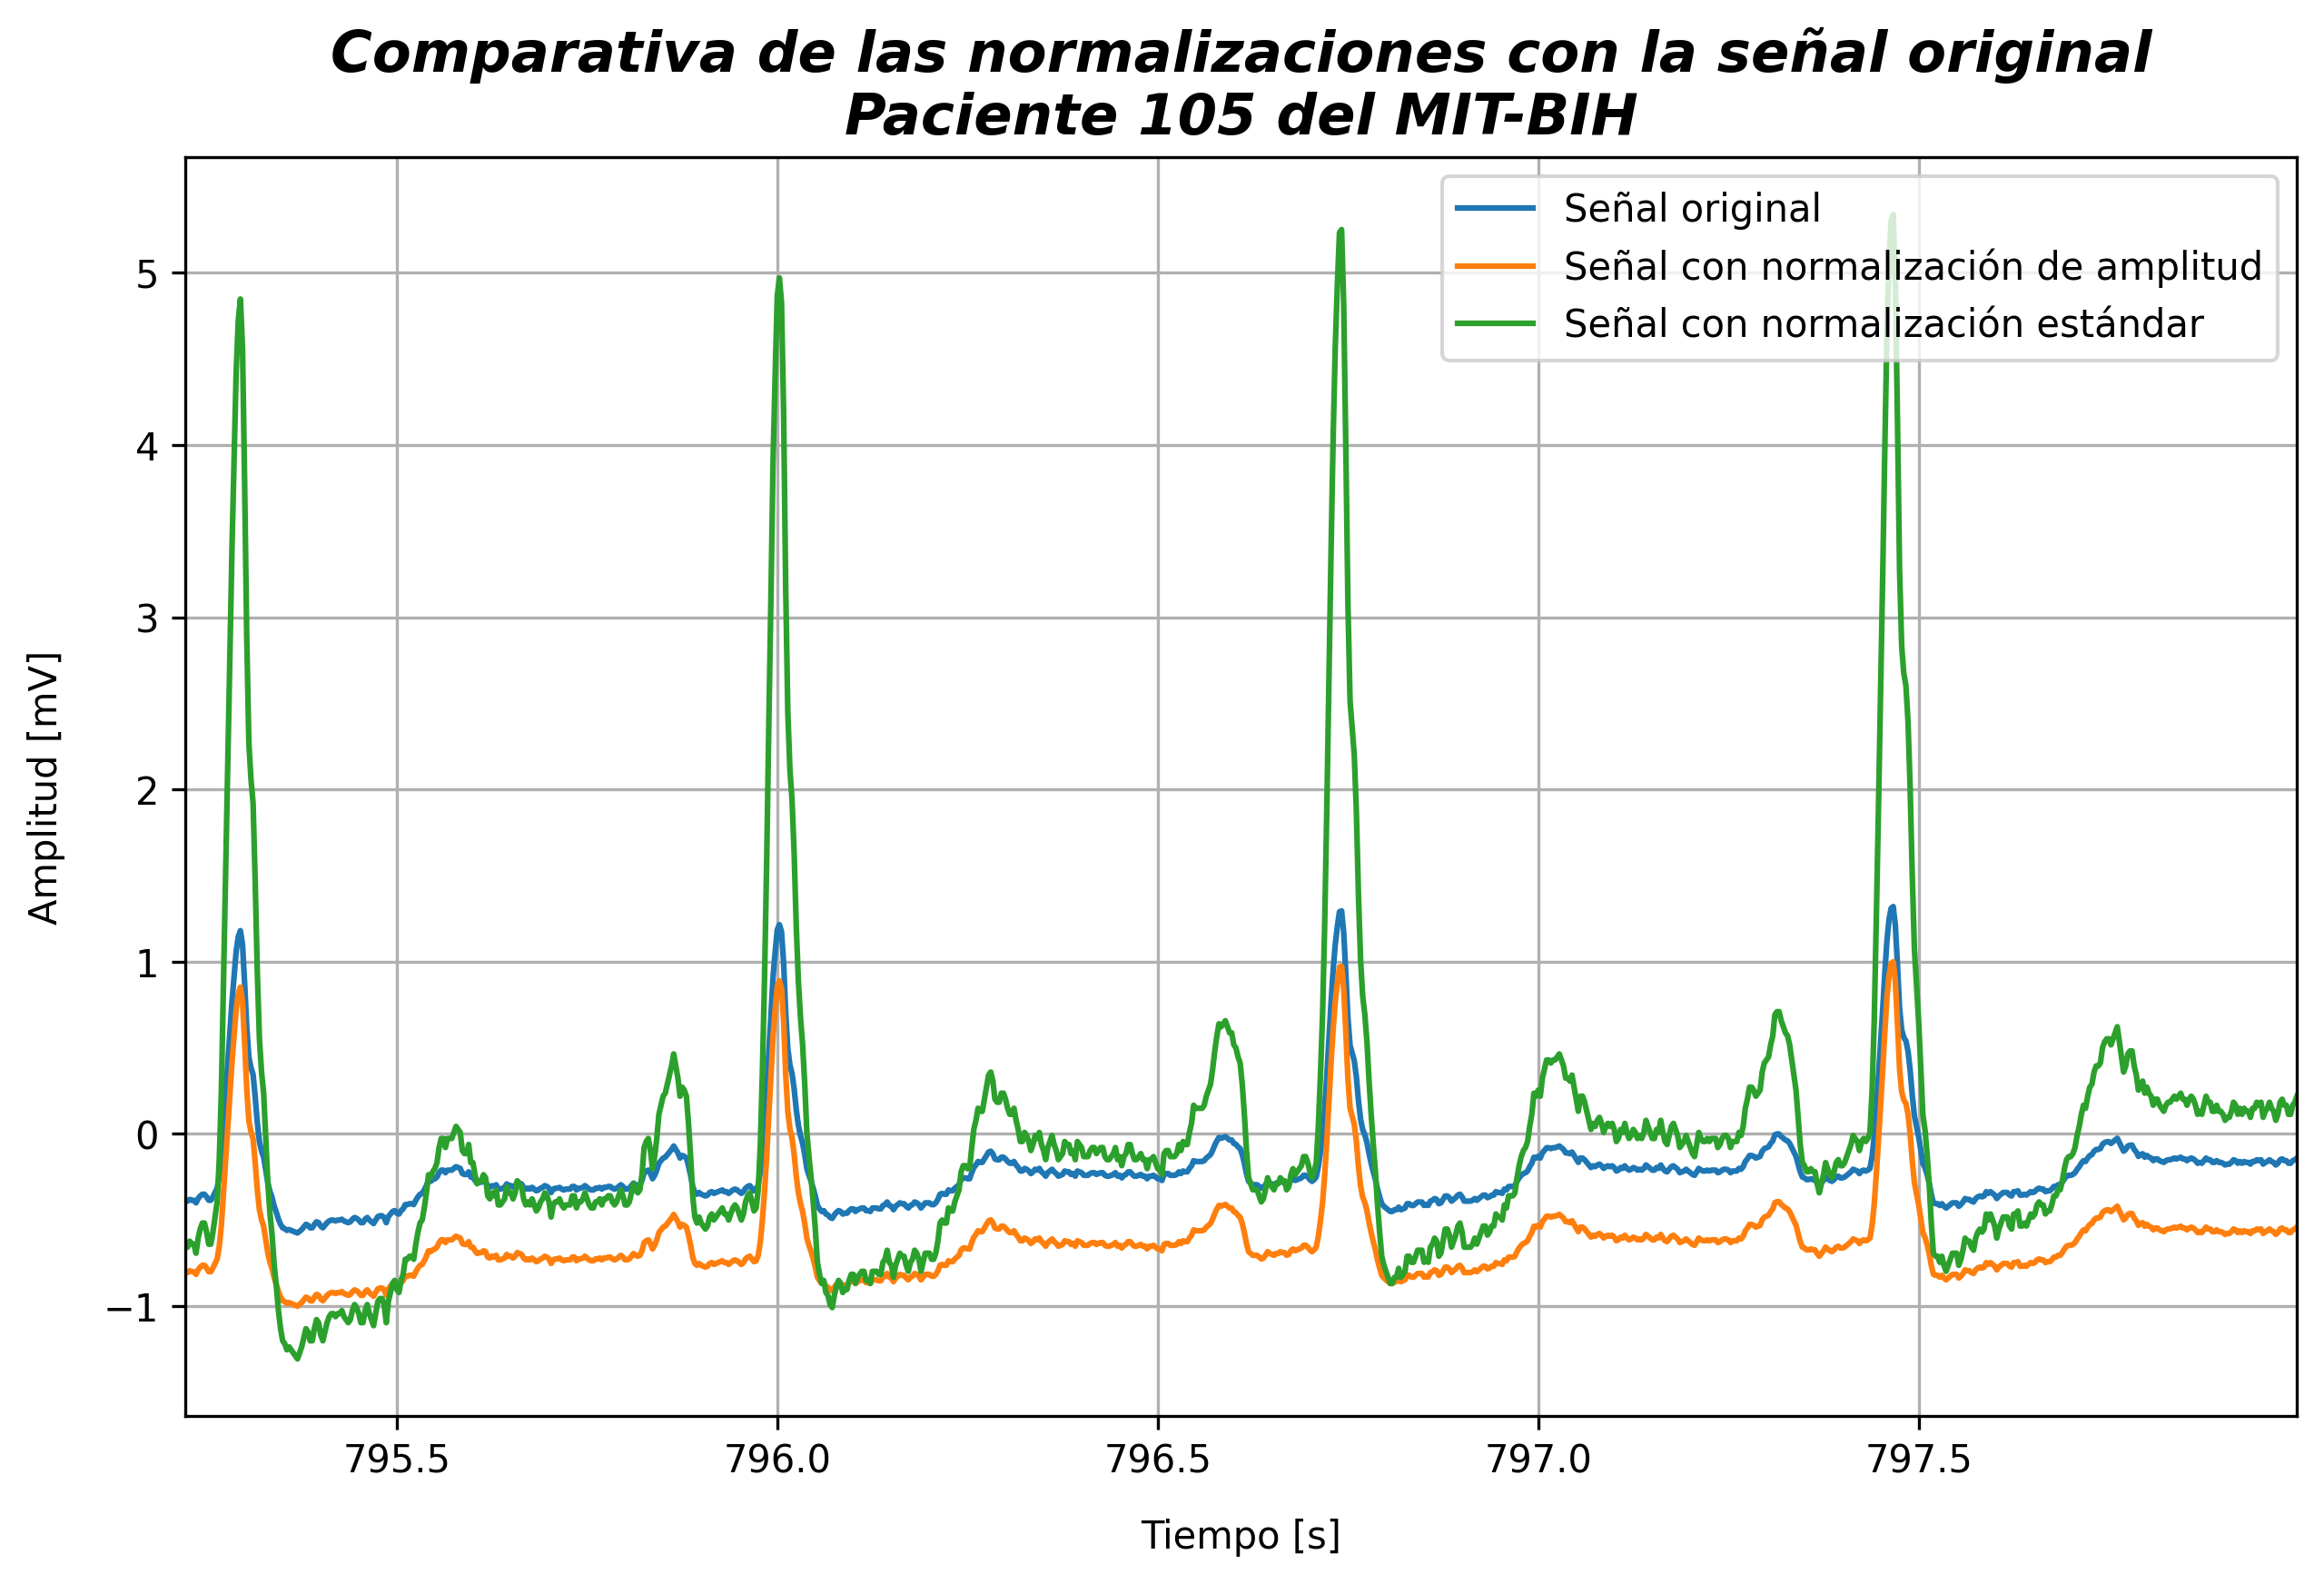

In [39]:
fig = plt.figure(figsize=(10, 6), dpi=300)
ax = fig.add_subplot(111)
ax.set_title("Comparativa de las normalizaciones con la señal original\nPaciente 105 del MIT-BIH", weight='bold',fontsize=15, fontstyle='italic')
ax.set_xlabel("Tiempo [s]", labelpad=10)
ax.set_ylabel("Amplitud [mV]", labelpad=10)

# Grafica las dos señales en el eje
ax.plot(time,senal_ecg_canal_I, label='Señal original')
ax.plot(time,senal_ecg_I_NA, label='Señal con normalización de amplitud')
ax.plot(time,senal_ecg_I_filtrada_NS,label='Señal con normalización estándar')

# Ajusta el ancho de la gráfica para que sea igual al de la señal
ax.set_xlim(min(time), max(time))

# Activa la cuadrícula en el eje
ax.grid(True)

# # Agrega una línea en x=0
# ax.axhline(y=0, color='black', linestyle='-')

# Agrega una leyenda
ax.legend(loc='upper right')

# Muestra la gráfica
plt.savefig("ImagenesGuardadas\\Normalizacion.png")
plt.show()